In [68]:
#imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer

In [73]:
!pip install --upgrade category_encoders --quiet

In [69]:
df=pd.read_csv('../raw_data/Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [70]:
df['date']=pd.to_datetime(df['date'])

In [71]:
X=df[['date', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type']]
y=df[['Usage_kWh']]

In [73]:
X = X.rename(columns={'Lagging_Current_Reactive.Power_kVarh':'Lag_curr_Re',
       'Leading_Current_Reactive_Power_kVarh':'Leas_curr_rea',
       'Lagging_Current_Power_Factor':'Lag_curr_Po_fac', 'Leading_Current_Power_Factor':'Lead_curr_Po_fac'})

In [74]:
X.head()

,date,Lag_curr_Re,Leas_curr_rea,CO2(tCO2),Lag_curr_Po_fac,Lead_curr_Po_fac,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

 Catogorical Columns Encoding

In [78]:
X.head()

,date,Lag_curr_Re,Leas_curr_rea,CO2(tCO2),Lag_curr_Po_fac,Lead_curr_Po_fac,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [49]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Load_Type'],return_df=True,
                           mapping=[{'col':'Load_Type',
'mapping':{'None':0,'Light_Load':1, 'Medium_Load':2, 'Maximum_Load':3}}])


In [50]:
X_trainn['Load_Type'] = encoder.fit_transform(X_trainn['Load_Type'])

/tmp/ipykernel_2551/1673970878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_trainn['Load_Type'] = encoder.fit_transform(X_trainn['Load_Type'])


Feature Scaling

In [54]:
#Scale features
scaler = StandardScaler()
X_trainn = scaler.fit_transform(X_trainn)

Correlation Heatmap

<AxesSubplot:>

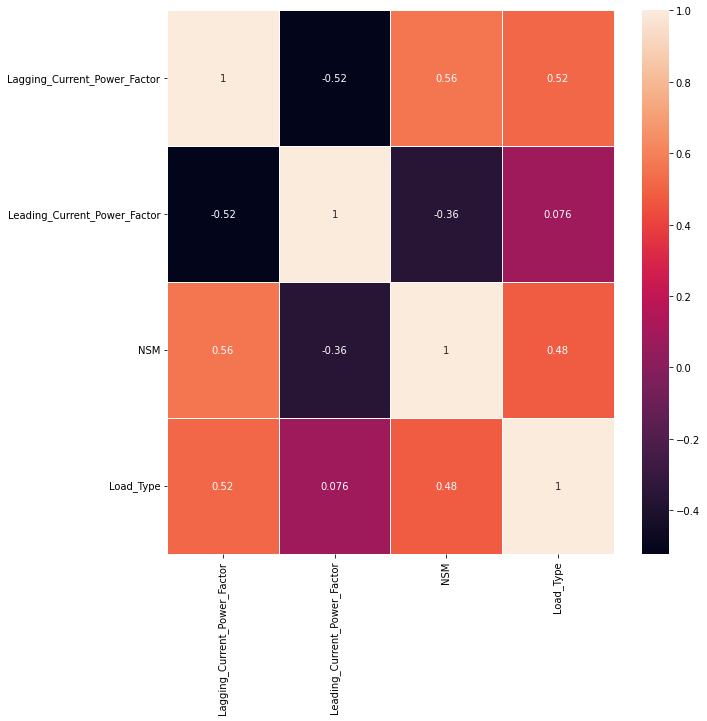

In [67]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(X_trainn.corr(), annot=True, linewidths=.5, ax=ax)